<a href="https://www.kaggle.com/code/diegobormor/nba-2022-2023-data-overview?scriptVersionId=154926741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **NBA Regular Season Data Analysis**

- ***The objective of this analysis is to see if we can find correlation between things such as age with the player stats. We are also going to search for some curious stats on this season of 2022-2023***

- ***If you have any trouble with the collumn names, you can check the original dataset home page with the meaning of each one: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular/data***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

- ***Lets start with importing our database for the 2022-2022 season, witch contais stats for all the NBA players on the regular season***

In [2]:
df = pd.read_csv('../input/20222023-nba-player-stats-regular/2022-2023 NBA Player Stats - Regular.csv', delimiter = ';', index_col = 'Player', encoding = 'ISO-8859-1')

- ***Who played the most games this season?***

In [3]:
most_games = df['G'].sort_values(ascending=False)
most_games.head(15)

Player
Mikal Bridges         83
Harrison Barnes       82
Patrick Williams      82
Tari Eason            82
Kenyon Martin Jr.     82
Derrick White         82
Isaiah Hartenstein    82
Nikola Vu?evi?        82
Jordan Poole          82
Kevon Looney          82
Jevon Carter          81
Malik Beasley         81
Terance Mann          81
Immanuel Quickley     81
Ayo Dosunmu           80
Name: G, dtype: int64

- ***9 players have played 82 games, meaning they participated of the whole NBA calendar. But we can see that someone played 83! How?***
- ***Mikal Bridges has played more games than any team on the NBA, as teams plays 82 games per regular season, probably because due to a switch in the middle of the season. Let's see some of his stats and see in which of the teams he did best***

In [4]:
mikal = df.loc['Mikal Bridges']
mikal

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Mikal Bridges,58,SF,26,TOT,83,83,35.7,7.1,15.3,0.468,...,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
Mikal Bridges,58,SF,26,PHO,56,56,36.4,6.3,13.6,0.463,...,0.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2
Mikal Bridges,58,SF,26,BRK,27,27,34.2,8.9,18.6,0.475,...,0.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1


- ***He played 27 games for Brooklin Nets and 56 for Phoenix Suns and had pretty significant stats on both teams. Let's compare them in a graphic.***

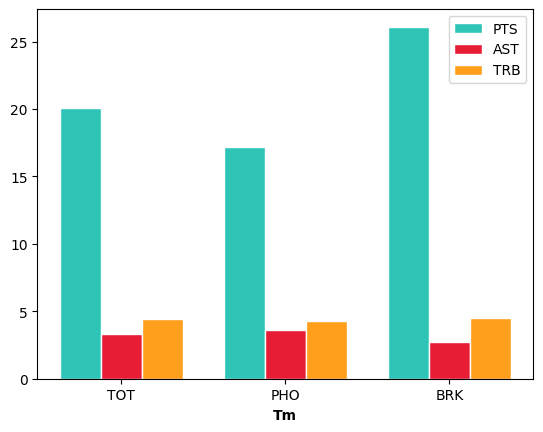

In [5]:
bar_width = 0.25

r1 = np.arange(len(mikal['PTS']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, mikal['PTS'], color='#2ec4b6', width=bar_width, edgecolor='white', label='PTS')
plt.bar(r2, mikal['AST'], color='#e71d36', width=bar_width, edgecolor='white', label='AST')
plt.bar(r3, mikal['TRB'], color='#ff9f1c', width=bar_width, edgecolor='white', label='TRB')

plt.xlabel('Tm', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mikal['G']))], mikal['Tm'])

plt.legend()
plt.show()

- ***Just by looking at those three stats we can get to the conclusion that Mikal Bridges was a scorer in Brooklin and more of a team player in Phoenix, as his average assist number was higher, and his average points were significantly lower. Let's dive deeply into his stats to see why that happened.***

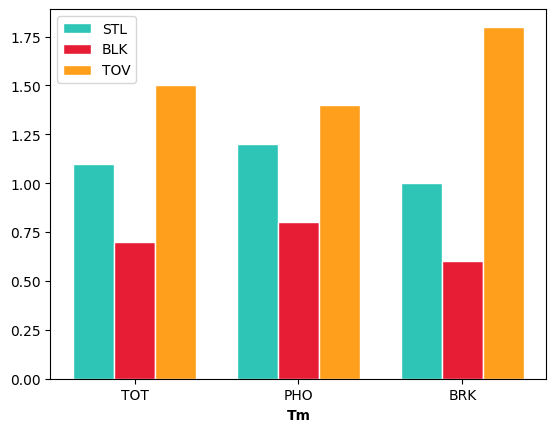

In [6]:
plt.bar(r1, mikal['STL'], color='#2ec4b6', width=bar_width, edgecolor='white', label='STL')
plt.bar(r2, mikal['BLK'], color='#e71d36', width=bar_width, edgecolor='white', label='BLK')
plt.bar(r3, mikal['TOV'], color='#ff9f1c', width=bar_width, edgecolor='white', label='TOV')

plt.xlabel('Tm', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mikal['G']))], mikal['Tm'])

plt.legend()
plt.show()

- ***As we can confirm, although he scored less points, he improved in almost every other stat, averaging better defensive stats, assists and less turnovers, meaning thet he is a great all arounder, with high adaptability in the game. With solid stats, we can see why Mikal Bridges has played more league games than any other player (and team)!***

- ***Now let's look at some league stats. In this analysis, we are going to filter players who played at least 41 games. We are also cleaning data to reduce bias by removing the rows which "TOT" is the players team (as it sums up the stats if the player has played on more than one team).***

In [7]:
df = df[df['Tm'] != 'TOT']
dfo40 = df[df['G'] > 40]

- ***Then we can compare if older players are performing better than younger ones***

In [8]:
df_u26 = dfo40[dfo40['Age'] < 26]
df_u31 = dfo40[(dfo40['Age'] >= 26) & (dfo40['Age'] < 31)]
df_over = dfo40[dfo40['Age'] >= 31]

avg_stats_under = df_u26[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP']].mean()
avg_stats_peak = df_u31[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP']].mean()
avg_stats_over = df_over[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP']].mean()

data = {'Under 26': avg_stats_under, '26-30': avg_stats_peak, 'Over 30': avg_stats_over}

df_avg_stats = pd.DataFrame(data)
df_avg_stats = df_avg_stats.round(decimals = 1)
df_avg_stats.sum(axis=0)
df_avg_stats.sum(axis=1)

print(df_avg_stats)

     Under 26  26-30  Over 30
PTS      11.1   12.4     12.2
AST       2.2    2.8      3.3
TRB       4.2    4.7      4.2
STL       0.7    0.8      0.7
BLK       0.5    0.5      0.4
MP       23.4   25.3     25.3


- ***Players at the "peak years" perform better and have more minutes than other ages. With more time in the league, they tend to read the game better, what probably explains why the assists number is ascending as time goes by.***

- ***Lebron James is known for his longevity. Last year he had 37 years and was playing his 20th season. Let's compare him with the NBA.***

In [9]:
df_LeBron = df.loc['LeBron James']
avg_stats_LeBron = df_LeBron[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP']]

df_LeBron = df_avg_stats.assign(Lebron = avg_stats_LeBron)
df_LeBron = df_LeBron.round(decimals = 1)
print(df_LeBron)

     Under 26  26-30  Over 30 Lebron
PTS      11.1   12.4     12.2   28.9
AST       2.2    2.8      3.3    6.8
TRB       4.2    4.7      4.2    8.3
STL       0.7    0.8      0.7    0.9
BLK       0.5    0.5      0.4    0.6
MP       23.4   25.3     25.3   35.5


- ***Here we can see how he is still considered one of the best players in the NBA: way above average stats in comparison to the rest of the league.***

- ***A relevant question is: isn't it unfair? Comparing a solid starter with data that includes substitutes? So, we can filter only players that started at least 41 games, half of the season and repeat this table.***

In [10]:
df_LeBron_start  = df[df['GS'] > 40]
avg_NBA_stats = df_LeBron_start[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP']].mean()
data = {'NBA Starters': avg_NBA_stats, 'LeBron': avg_stats_LeBron}
df_Lebron_vs_NBA = pd.DataFrame(data)
df_Lebron_vs_NBA = df_Lebron_vs_NBA.round(decimals = 1)
df_Lebron_vs_NBA.sum(axis=0)
df_Lebron_vs_NBA.sum(axis=1)

print(df_Lebron_vs_NBA)

     NBA Starters LeBron
PTS          16.7   28.9
AST           3.8    6.8
TRB           5.7    8.3
STL           0.9    0.9
BLK           0.6    0.6
MP           31.2   35.5


- ***One more time, the "King" has above-average stats, proving that even among starters he still has a dominance in the NBA, playing in his year -20- in the league. A legend never to be seen.***

- ***True Shot percentage is a special metric that measures the efficiency of a player to score points. It includes 2pt shots, 3pt shots and free throws. Some people are against this metric, because some players can get over 1.0 efficiency.***

In [11]:
df['TS%'] = np.where((2 * (df['FGA'] + 0.44 * df['FTA'])) != 0, df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA'])), 0)
df_sorted = df.sort_values('TS%', ascending=False)
df_sorted.head()

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Braxton Key,266,SF,25,DET,3,0,3.0,0.3,0.3,1.0,...,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,1.3,1.069079
A.J. Lawson,284,SG,22,MIN,1,0,2.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000
Justin Champagnie,88,SF,21,TOR,3,0,3.7,1.0,1.0,1.0,...,0.3,1.0,1.3,0.3,0.0,0.0,0.0,0.3,2.0,1.000000
Chris Silva,443,PF,26,DAL,1,0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.000000
Tyler Dorsey,126,SG,26,DAL,3,0,2.7,1.3,1.7,0.8,...,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,3.0,0.882353


- ***As we can see, seems like players with little ammount of games played cannot be taken into account, because the formula is not able co correctly measute it. In this case, we can sort it again to only display players that have started at least 41 games.***

In [12]:
df_sorted = df_sorted[df_sorted['GS'] > 40]
df_sorted.head(30)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Dwight Powell,395,C,31,DAL,76,64,19.2,2.6,3.5,0.732,...,2.0,2.2,4.1,0.9,0.6,0.3,0.9,2.8,6.7,0.749776
Daniel Gafford,156,C,24,WAS,78,47,20.6,3.7,5.1,0.732,...,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0,0.730994
Nikola Joki?,249,C,27,DEN,69,69,33.7,9.4,14.8,0.632,...,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,0.702408
Nic Claxton,94,C,23,BRK,76,76,29.9,5.4,7.7,0.705,...,2.4,6.8,9.2,1.9,0.9,2.5,1.3,2.8,12.6,0.691700
Rudy Gobert,167,C,30,MIN,70,70,30.7,5.1,7.8,0.659,...,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4,0.672961
Jarrett Allen,8,C,24,CLE,68,68,32.6,5.9,9.2,0.644,...,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3,0.671235
Mason Plumlee,385,C,32,CHO,56,56,28.5,4.7,7.1,0.669,...,3.3,6.3,9.7,3.7,0.6,0.6,1.6,2.9,12.2,0.668566
Domantas Sabonis,428,C,26,SAC,79,79,34.6,7.3,11.9,0.615,...,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,0.666899
Ivica Zubac,539,C,25,LAC,76,76,28.6,4.3,6.8,0.634,...,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8,0.661440


- ***Those are more accurate stats, but we can still see a pattern. Most of the players at the top of the list play at the Center position. That is expected, as it is the closest position from the basket.***
- ***The best way to measure this stats is by looking at the players position. We can separate them by Center, Point-Foward/Small-Foward and Shooting Guard/Point Guard.***

In [13]:
df_C = df_sorted[df_sorted['Pos'] == 'C']
df_SFPF = df_sorted[df_sorted['Pos'].isin(['SF', 'PF'])]
df_SGPG = df_sorted[df_sorted['Pos'].isin(['SG', 'PG'])]

In [14]:
df_C.head(10)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Dwight Powell,395,C,31,DAL,76,64,19.2,2.6,3.5,0.732,...,2.0,2.2,4.1,0.9,0.6,0.3,0.9,2.8,6.7,0.749776
Daniel Gafford,156,C,24,WAS,78,47,20.6,3.7,5.1,0.732,...,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0,0.730994
Nikola Joki?,249,C,27,DEN,69,69,33.7,9.4,14.8,0.632,...,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,0.702408
Nic Claxton,94,C,23,BRK,76,76,29.9,5.4,7.7,0.705,...,2.4,6.8,9.2,1.9,0.9,2.5,1.3,2.8,12.6,0.691700
Rudy Gobert,167,C,30,MIN,70,70,30.7,5.1,7.8,0.659,...,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4,0.672961
Jarrett Allen,8,C,24,CLE,68,68,32.6,5.9,9.2,0.644,...,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3,0.671235
Mason Plumlee,385,C,32,CHO,56,56,28.5,4.7,7.1,0.669,...,3.3,6.3,9.7,3.7,0.6,0.6,1.6,2.9,12.2,0.668566
Domantas Sabonis,428,C,26,SAC,79,79,34.6,7.3,11.9,0.615,...,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,0.666899
Ivica Zubac,539,C,25,LAC,76,76,28.6,4.3,6.8,0.634,...,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8,0.661440


In [15]:
df_SFPF.head(10)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Corey Kispert,268,SF,23,WAS,74,45,28.3,3.9,7.9,0.497,...,0.4,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1,0.658519
Trey Murphy III,350,SF,22,NOP,79,65,31.0,4.9,10.1,0.484,...,0.7,2.8,3.6,1.4,1.1,0.5,0.8,2.0,14.5,0.649875
Jimmy Butler,75,SF,33,MIA,64,64,33.4,7.5,13.9,0.539,...,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,0.645871
Lauri Markkanen,307,SF,25,UTA,66,66,34.4,8.7,17.3,0.499,...,2.0,6.7,8.6,1.9,0.6,0.6,1.9,2.1,25.6,0.641926
Kenyon Martin Jr.,311,SF,22,HOU,82,49,28.0,5.0,8.8,0.569,...,1.5,4.0,5.5,1.5,0.5,0.4,1.1,1.8,12.7,0.635763
Harrison Barnes,27,PF,30,SAC,82,82,32.5,4.6,9.6,0.473,...,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,0.635593
Bojan Bogdanovi?,46,PF,33,DET,59,59,32.1,7.3,14.9,0.488,...,0.6,3.2,3.8,2.6,0.6,0.1,2.3,1.9,21.6,0.629958
Kawhi Leonard,288,SF,31,LAC,52,50,33.6,8.6,16.8,0.512,...,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,0.620567
Michael Porter Jr.,390,SF,24,DEN,62,62,29.0,6.4,13.2,0.487,...,1.0,4.5,5.5,1.0,0.6,0.5,1.1,1.9,17.4,0.619835


In [16]:
df_SGPG.head(10)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,108,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,0.656250
Damian Lillard,292,PG,32,POR,58,58,36.3,9.6,20.7,0.463,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,0.645964
Shai Gilgeous-Alexander,164,PG,24,OKC,68,68,35.5,10.4,20.3,0.510,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,0.625598
Tyrese Haliburton,186,PG,22,IND,56,56,33.6,7.4,15.0,0.490,...,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7,0.624096
Gary Harris,194,SG,28,ORL,48,42,24.7,2.9,6.4,0.450,...,0.4,1.6,2.0,1.2,0.9,0.3,0.6,1.9,8.3,0.622749
Kevin Huerter,222,SG,24,SAC,75,75,29.4,5.6,11.5,0.485,...,0.6,2.8,3.3,2.9,1.1,0.3,1.3,2.4,15.2,0.620509
Quentin Grimes,184,SG,22,NYK,71,66,29.9,4.0,8.5,0.468,...,0.7,2.5,3.2,2.1,0.7,0.4,1.0,2.5,11.3,0.619789
Donovan Mitchell,338,SG,26,CLE,68,68,35.8,10.0,20.6,0.484,...,0.9,3.3,4.3,4.4,1.5,0.4,2.6,2.5,28.3,0.615860
Grayson Allen,7,SG,27,MIL,72,70,27.4,3.4,7.7,0.440,...,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4,0.612341


In [17]:
mean_C = df_C['TS%'].mean()
mean_SFPF = df_SFPF['TS%'].mean()
mean_SGPG = df_SGPG['TS%'].mean()
print(mean_C, mean_SFPF, mean_SGPG)

0.6381634163425789 0.5845535712858454 0.5753578703911402


- ***As expected, we can find a negative correlation between the distance from the basket and the shot efficiency. The forwards are closer than the guards, but play at a higher distance than the center.***
- ***Let's look at the graphic:***

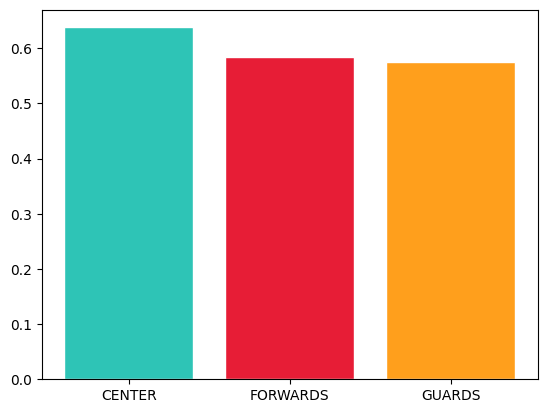

In [18]:
categories = ['CENTER', 'FORWARDS', 'GUARDS']
values = [mean_C, mean_SFPF, mean_SGPG]

plt.bar(categories, values, color=['#2ec4b6', '#e71d36', '#ff9f1c'], edgecolor='white')
plt.show()

- ***Starters usually start games for a reason, probably because they score more points. We can see the correlation between those two below***

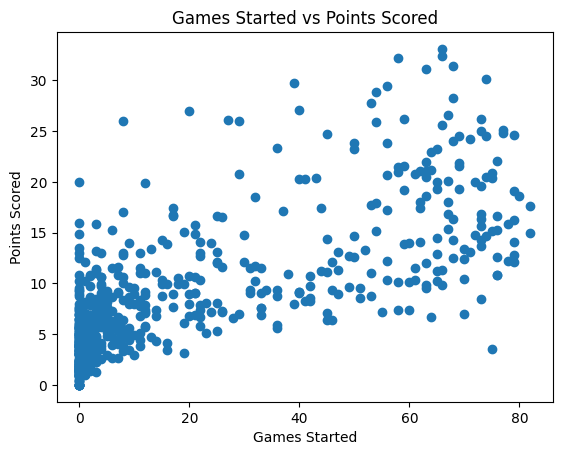

In [19]:
plt.scatter(df['GS'], df['PTS'])

# Set the labels for the x and y axes
plt.xlabel('Games Started')
plt.ylabel('Points Scored')

# Set the title of the plot
plt.title('Games Started vs Points Scored')

# Display the plot
plt.show()

In [20]:
correlation = df['GS'].corr(df['PTS'])
covariance = df['GS'].cov(df['PTS'])
print(correlation, covariance)

0.7309946242104403 128.10122747601764


- ***We can really observe a high correlation and a significante positive covariance between these two variables.***

- ***This Notebook will keep being refreshed!!***